# Deep Learning - Home Loan Repayment Prediction
-Dheeraj Prakaash

- Building a deep learning model to predict whether or not an applicant will be able to repay a bank loan using historical data


## 1. EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('DL_day08_project_homeloan_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Observation:
- 122 columns
- 307511 rows
- multiple dtypes: numerical and categorical

.. but I cannot see which columns are what datatype.

In [3]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# Separating columns by data type

# For float columns
float_cols = data.select_dtypes(include='float').columns.tolist()
print("Float columns:", float_cols)

# For int columns
int_cols = data.select_dtypes(include='int').columns.tolist()
print("Integer columns:", int_cols)

# For object (e.g., strings) columns
object_cols = data.select_dtypes(include='object').columns.tolist()
print("Object columns:", object_cols)


Float columns: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAP

In [5]:
from collections import defaultdict

dtype_summary = defaultdict(list)
for col in data.columns:
    dtype_summary[data[col].dtype].append(col)

for dtype, cols in dtype_summary.items():
    print(f"{dtype}: {len(cols)} columns")


int64: 41 columns
object: 16 columns
float64: 65 columns


In [6]:
# Checking for missing values
print("Missing values in each column:")
missing_val_cols = data.isnull().sum()[data.isnull().sum() > 0]

missing_val_cols

Missing values in each column:


AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

Analyzing **missing value statistics** and their dtypes

In [7]:
missing_df = missing_val_cols.to_frame(name='num_missing_val')

# Add percent missing
missing_df['percent_missing_val'] = round((missing_df['num_missing_val'] / data.shape[0]) * 100, 3)

# Add data types
missing_df['dtype'] = data[missing_df.index].dtypes.values
missing_df = missing_df.reset_index().rename(columns={'index': 'column'})

missing_df


,column,num_missing_val,percent_missing_val,dtype
0,AMT_ANNUITY,12,0.004,float64
1,AMT_GOODS_PRICE,278,0.090,float64
2,NAME_TYPE_SUITE,1292,0.420,object
3,OWN_CAR_AGE,202929,65.991,float64
4,OCCUPATION_TYPE,96391,31.346,object
...,...,...,...,...
62,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.502,float64
63,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.502,float64
64,AMT_REQ_CREDIT_BUREAU_MON,41519,13.502,float64
65,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.502,float64


> So, from the above dataframe, I can see 67 columns having missing values.

> I want to remove columns that have >52% missing values and update the data for further analysis

C:\Users\dheej\AppData\Local\Temp\ipykernel_11228\2173937649.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='percent_missing_val', y='column', data=missing_df, palette='viridis')


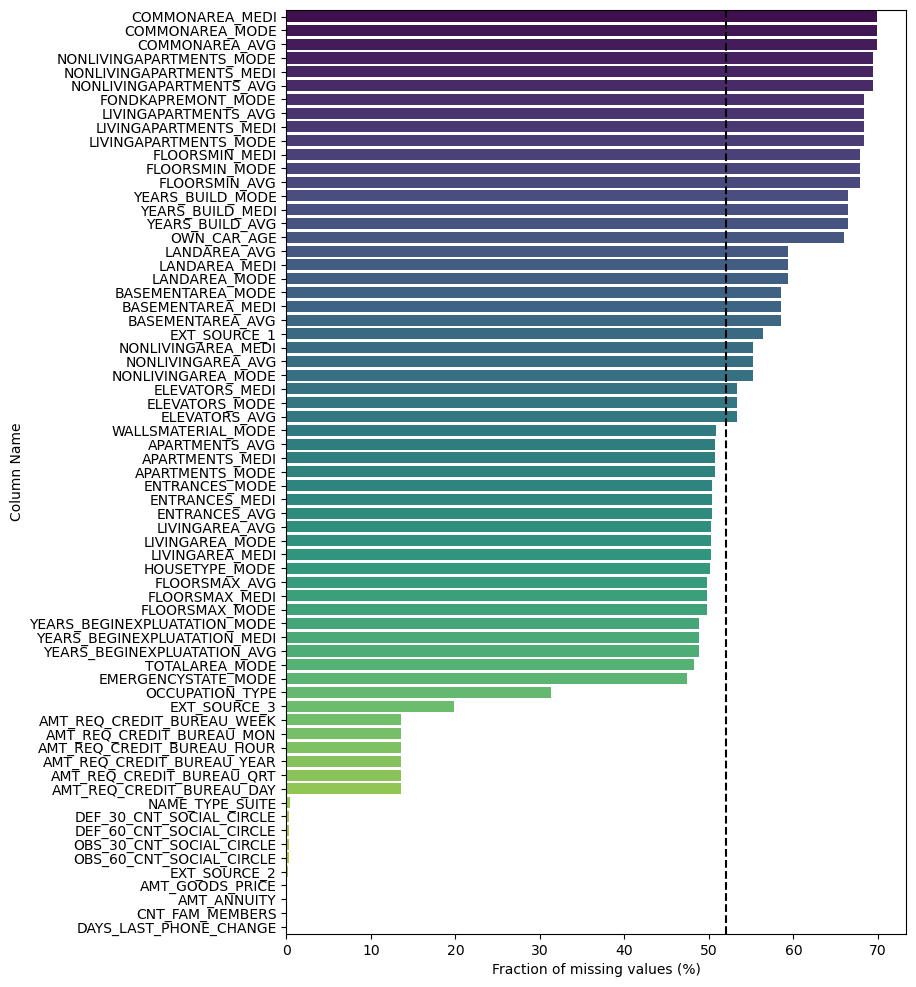

In [8]:
# Visualizing the distribution of missing values across columns and ..
# .. how many columns have more than 52% missing values

missing_df.sort_values(by='percent_missing_val', ascending=False, inplace=True)
plt.figure(figsize=(8, 12))
ax = sns.barplot(x='percent_missing_val', y='column', data=missing_df, palette='viridis')
ax.set_xlabel('Fraction of missing values (%)')
ax.set_ylabel('Column Name')
plt.axvline(x=52, color='black', linestyle='--', linewidth=1.5)

Dtype codes:
 [1 1 2 2 2 2 1 0 0 0 0 2 2 2 2 2 0 1 1 0 1 0 1 1 1 1 1 1 2 0 1 1 2 1 1 1 1
 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0]
Dtype categories:
 Index(['float64', 'int64', 'object'], dtype='object')

      0 | float  | BLUE, 
      1 | int64  | GREY, 
      2 | object | RED


C:\Users\dheej\AppData\Local\Temp\ipykernel_11228\1325478443.py:41: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


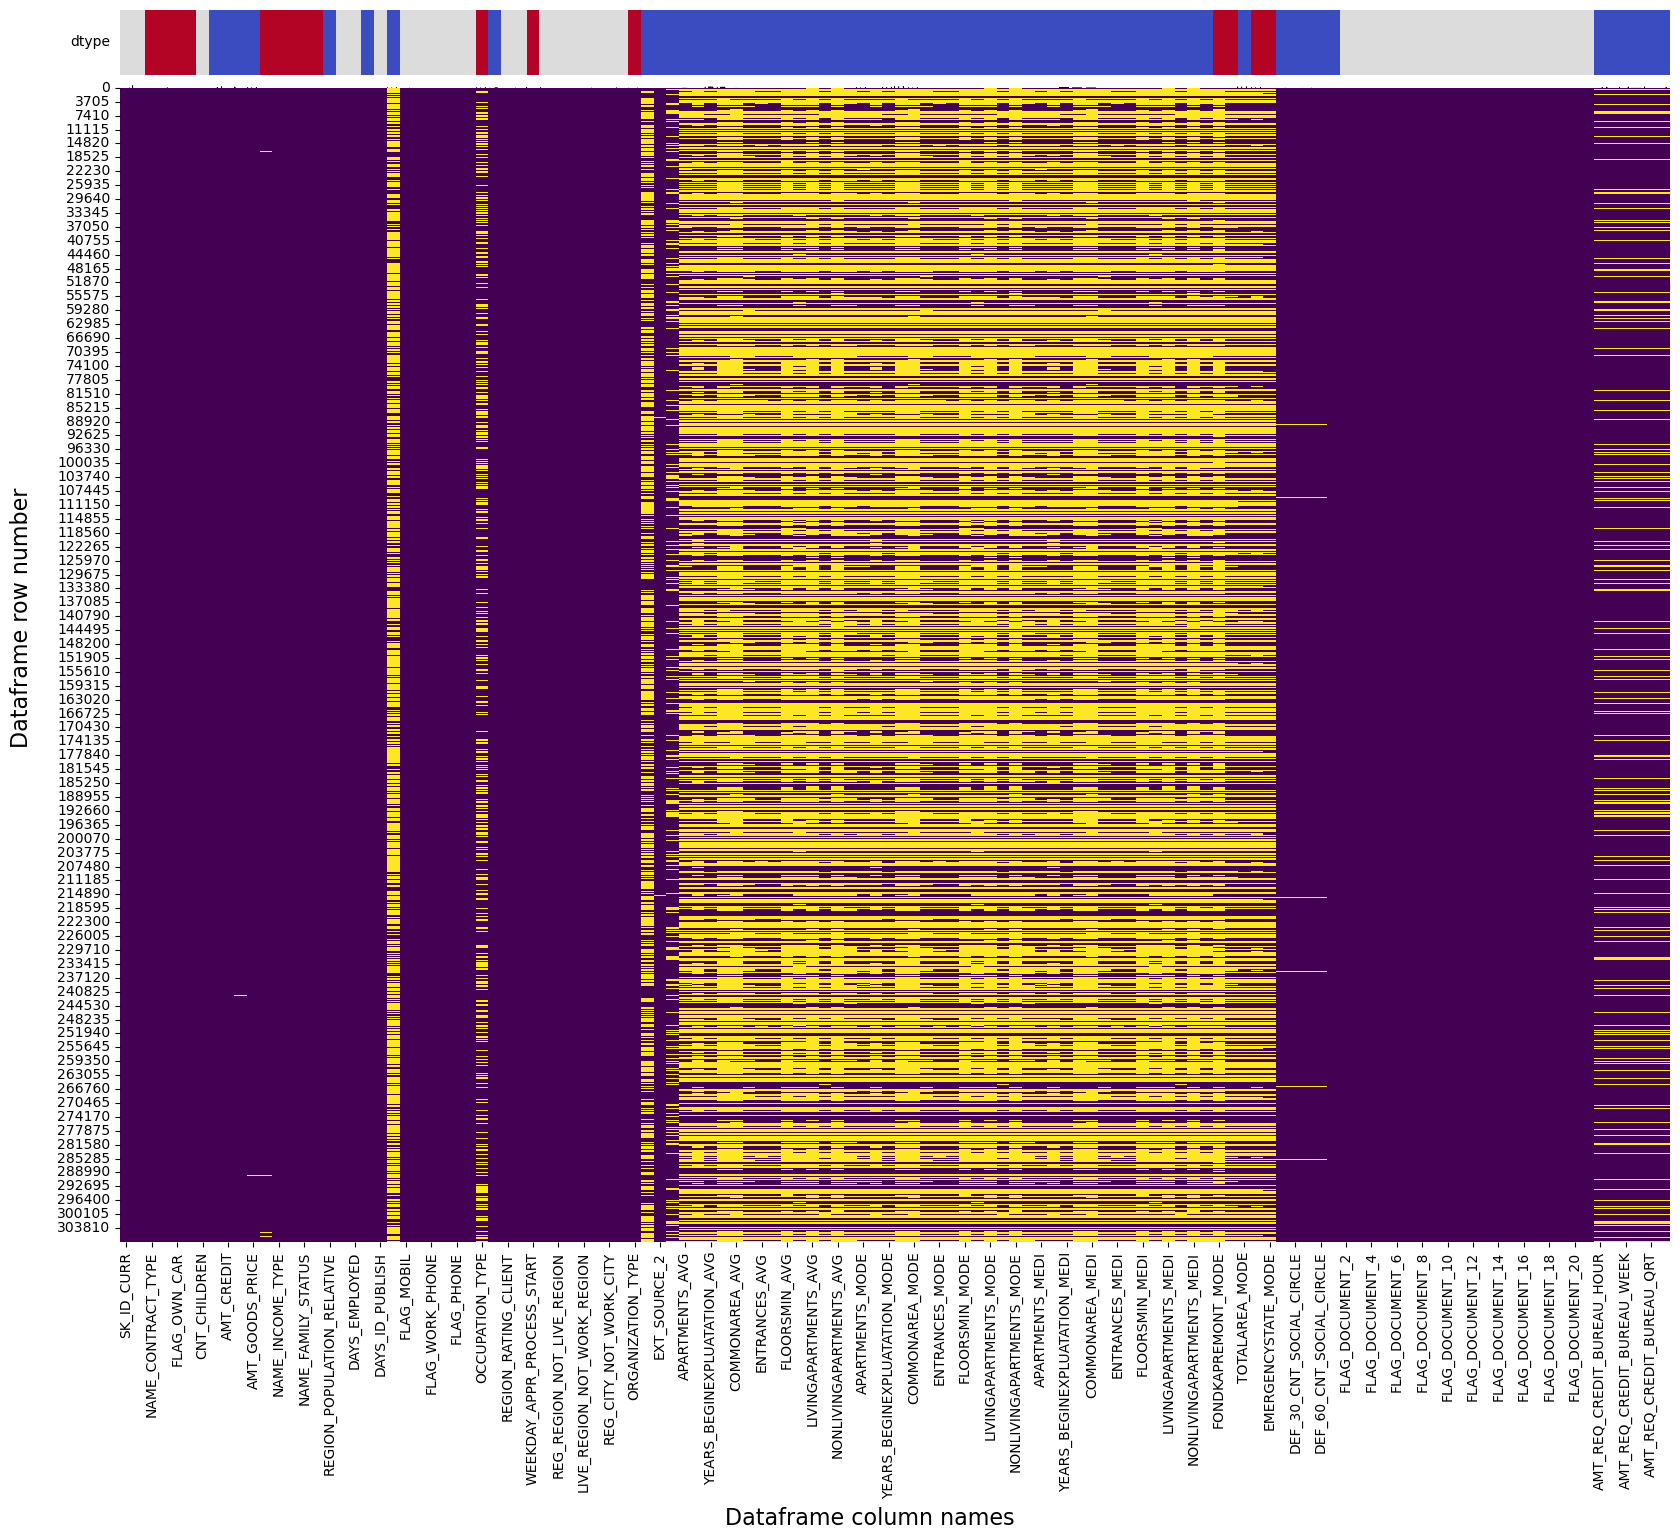

In [ ]:
# visualization of the location of most missing values in the dataset

missing_mask = data.isnull()
dtypes = data.dtypes.astype(str)

# Map dtypes to integers for colormap
dtype_categories = pd.Categorical(dtypes)
dtype_codes = dtype_categories.codes  # int=0, float=1, object=2...
print("Dtype codes:\n", dtype_codes)
print("Dtype categories:\n", dtype_categories.categories)
print("""
      0 | float  | BLUE, 
      1 | int64  | GREY, 
      2 | object | RED""")

# Create a 2D array (1 row) for the dtype heatmap
dtype_row = np.array([dtype_codes])
fig = plt.figure(figsize=(20, 16))

# Plot the dtype row heatmap on top
ax1 = plt.subplot2grid((16, 1), (0, 0), rowspan=1)
sns.heatmap(dtype_row, cmap='coolwarm', cbar=False, xticklabels=data.columns, yticklabels=['dtype'], ax=ax1)
#ax1.set_xticks(np.arange(len(data.columns)))  # explicitly set positions
#ax1.set_xticklabels(data.columns, rotation=90, fontsize=8)
ax1.set_yticklabels(['dtype'], rotation=0)
ax1.tick_params(left=False, bottom=False)

# Plot the missing values heatmap below
ax2 = plt.subplot2grid((16, 1), (1, 0), rowspan=15)
sns.heatmap(missing_mask, cbar=False, cmap='viridis', ax=ax2)
#ax2.set_xticklabels(data.columns, rotation=90, fontsize=8)
#ax2.set_yticklabels([])

fig.supxlabel('Dataframe column names', fontsize=16, y=-0.07)
fig.supylabel('Dataframe row number', fontsize=16, x=0.07)

plt.tight_layout()
plt.show()


> From the above plot, considering the blue-grey-red (float-int-object) datatype band, we can observe that ALL missing values (yellow heatmap cells) correspond to columns with `float` (blue bands) and `object` datatypes (red bands). Therefore, there's no need to impute columns with `int64` dtype

> This is basically a colour map visualization of `missing_df` dataframe.

## 2. Pre-processing

### 2.1 Dropping cols with >52% missing values

In [10]:
missing_df_52 = missing_df[missing_df['percent_missing_val'] > 52]
missing_df_52 = missing_df_52.sort_values(by='percent_missing_val', ascending=True)
missing_df_52

# Following columns i.e. with >52% missing values will be dropped

,column,num_missing_val,percent_missing_val,dtype
14,ELEVATORS_AVG,163891,53.296,float64
42,ELEVATORS_MEDI,163891,53.296,float64
28,ELEVATORS_MODE,163891,53.296,float64
50,NONLIVINGAREA_MEDI,169682,55.179,float64
36,NONLIVINGAREA_MODE,169682,55.179,float64
22,NONLIVINGAREA_AVG,169682,55.179,float64
6,EXT_SOURCE_1,173378,56.381,float64
10,BASEMENTAREA_AVG,179943,58.516,float64
24,BASEMENTAREA_MODE,179943,58.516,float64
38,BASEMENTAREA_MEDI,179943,58.516,float64


In [11]:
# Creating new_data by dropping columns with >52% missing values
missing_val_percent_cutoff = 52
new_data = data.drop(columns=missing_df[missing_df['percent_missing_val'] > missing_val_percent_cutoff]['column'].tolist())

print("Shape of new data:", new_data.shape, " - columns dropped:", len(missing_df[missing_df['percent_missing_val'] > missing_val_percent_cutoff]))
print("Shape of original data:", data.shape)


Shape of new data: (307511, 92)  - columns dropped: 30
Shape of original data: (307511, 122)


CHECKING MISSING VALUE STATS OF UPDATED DATA

In [12]:
# num of missing values in each column in new_data
new_data.isnull().sum()[new_data.isnull().sum() > 0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
YEARS_BEGINEXPLUATATION_AVG     150007
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
LIVINGAREA_AVG                  154350
APARTMENTS_MODE                 156061
YEARS_BEGINEXPLUATATION_MODE    150007
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
LIVINGAREA_MODE                 154350
APARTMENTS_MEDI                 156061
YEARS_BEGINEXPLUATATION_MEDI    150007
ENTRANCES_MEDI                  154828
FLOORSMAX_MEDI                  153020
LIVINGAREA_MEDI                 154350
HOUSETYPE_MODE                  154297
TOTALAREA_MODE                  148431
WALLSMATERIAL_MODE              156341
EMERGENCYSTATE_MODE      

In [13]:
print("Missing value stats for new_data:\n")

missing_val_cols_v2 = new_data.isnull().sum()[new_data.isnull().sum() > 0]
missing_df_v2 = missing_val_cols_v2.to_frame(name='num_missing_val')

# Add percent missing
missing_df_v2['percent_missing_val'] = round((missing_df_v2['num_missing_val'] / new_data.shape[0]) * 100, 3)

# Add data types
missing_df_v2['dtype'] = data[missing_df_v2.index].dtypes.values
missing_df_v2 = missing_df_v2.reset_index().rename(columns={'index': 'column'})

missing_df_v2

Missing value stats for new_data:



,column,num_missing_val,percent_missing_val,dtype
0,AMT_ANNUITY,12,0.004,float64
1,AMT_GOODS_PRICE,278,0.090,float64
2,NAME_TYPE_SUITE,1292,0.420,object
3,OCCUPATION_TYPE,96391,31.346,object
4,CNT_FAM_MEMBERS,2,0.001,float64
5,EXT_SOURCE_2,660,0.215,float64
6,EXT_SOURCE_3,60965,19.825,float64
7,APARTMENTS_AVG,156061,50.750,float64
8,YEARS_BEGINEXPLUATATION_AVG,150007,48.781,float64
9,ENTRANCES_AVG,154828,50.349,float64


### 2.2 Eliminating numerical cols highly correlated with another

<Axes: >

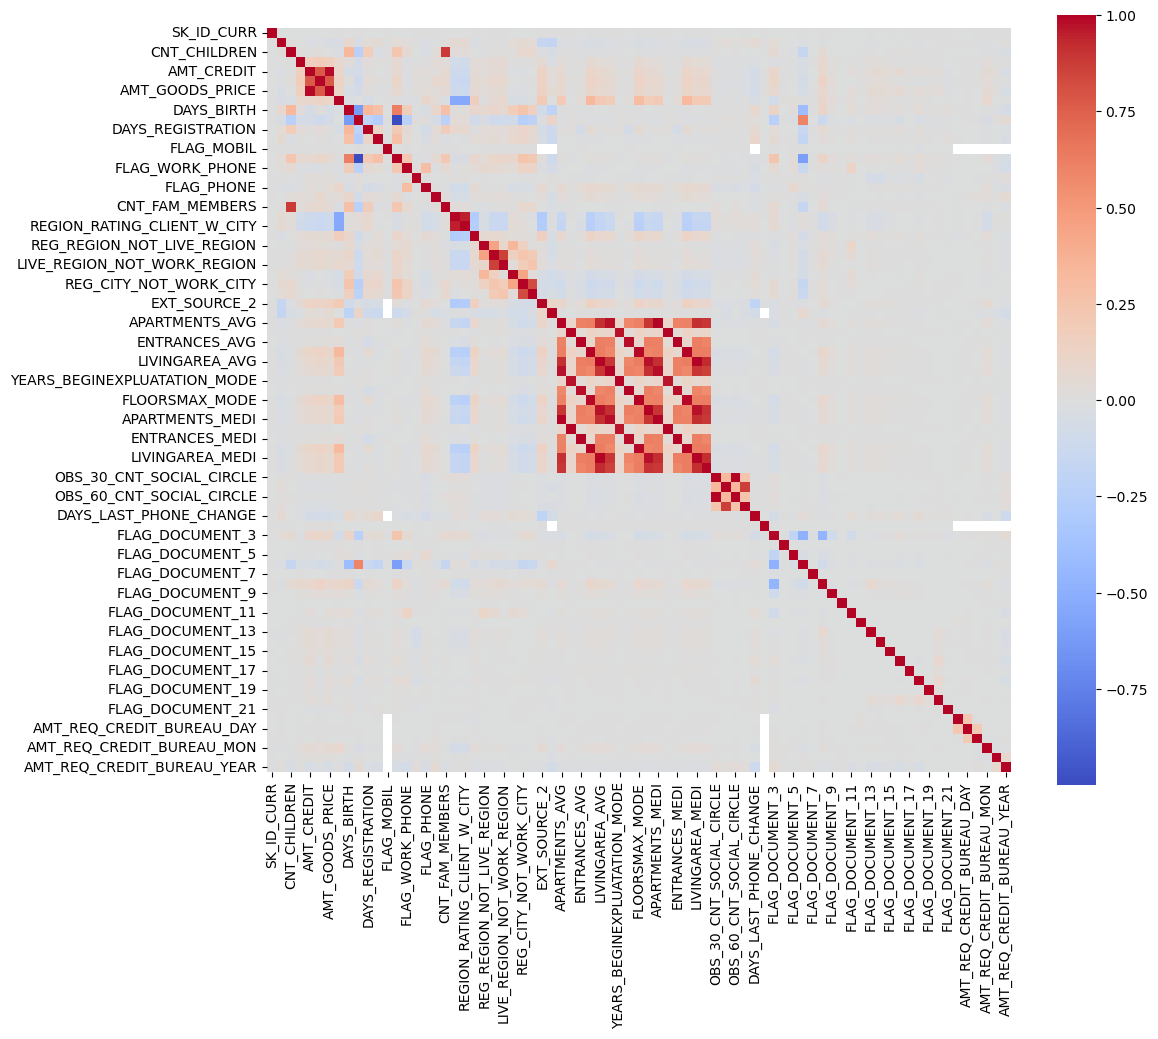

In [14]:
# print pearson correlation matrix for numerical features with a heatmap
corr = new_data.select_dtypes(include=['float', 'int']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True)

In [15]:
# print pairs of columns with correlation > 0.95 and < 1
corr_pairs = corr.unstack()
high_corr = corr_pairs[(corr_pairs > 0.95) & (corr_pairs < 1)]
high_corr

AMT_CREDIT                    AMT_GOODS_PRICE                 0.986968
AMT_GOODS_PRICE               AMT_CREDIT                      0.986968
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950842
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.950842
APARTMENTS_AVG                APARTMENTS_MODE                 0.973259
                              APARTMENTS_MEDI                 0.995081
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971893
                              YEARS_BEGINEXPLUATATION_MEDI    0.993825
ENTRANCES_AVG                 ENTRANCES_MODE                  0.977743
                              ENTRANCES_MEDI                  0.996886
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985689
                              FLOORSMAX_MEDI                  0.997034
LIVINGAREA_AVG                LIVINGAREA_MODE                 0.972050
                              LIVINGAREA_MEDI                 0.995596
APARTM

In [16]:
#split tuples in the index of high_corr into two columns
high_corr_df = high_corr.reset_index()
high_corr_df.columns = ['col1', 'col2', 'correlation']
high_corr_df

,col1,col2,correlation
0,AMT_CREDIT,AMT_GOODS_PRICE,0.986968
1,AMT_GOODS_PRICE,AMT_CREDIT,0.986968
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842
3,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950842
4,APARTMENTS_AVG,APARTMENTS_MODE,0.973259
5,APARTMENTS_AVG,APARTMENTS_MEDI,0.995081
6,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,0.971893
7,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,0.993825
8,ENTRANCES_AVG,ENTRANCES_MODE,0.977743
9,ENTRANCES_AVG,ENTRANCES_MEDI,0.996886


In [17]:
# Print one row for each unique correlation value
unique_corr_rows = high_corr_df.drop_duplicates(subset=['correlation'])
print(unique_corr_rows)

                            col1                          col2  correlation
0                     AMT_CREDIT               AMT_GOODS_PRICE     0.986968
2           REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY     0.950842
4                 APARTMENTS_AVG               APARTMENTS_MODE     0.973259
5                 APARTMENTS_AVG               APARTMENTS_MEDI     0.995081
6    YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE     0.971893
7    YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI     0.993825
8                  ENTRANCES_AVG                ENTRANCES_MODE     0.977743
9                  ENTRANCES_AVG                ENTRANCES_MEDI     0.996886
10                 FLOORSMAX_AVG                FLOORSMAX_MODE     0.985689
11                 FLOORSMAX_AVG                FLOORSMAX_MEDI     0.997034
12                LIVINGAREA_AVG               LIVINGAREA_MODE     0.972050
13                LIVINGAREA_AVG               LIVINGAREA_MEDI     0.995596
15          

In [18]:
# dropping one of the columns when pairwise correlation is > 0.95 
# choosing column names in 'col2' of 'unique_corr_rows' to drop
cols_to_drop = unique_corr_rows['col2'].tolist()
new_data_v2 = new_data.drop(columns=cols_to_drop)
print("Shape of new data after dropping columns with high correlation (>0.95):\n", new_data_v2.shape, " - columns dropped:", len(cols_to_drop))


Shape of new data after dropping columns with high correlation (>0.95):
 (307511, 79)  - columns dropped: 18


CHECKING MISSING VALUE STATS OF UPDATED DATA


In [19]:
print(f"Missing value stats in new_data_v2:\n")


# num of missing values in each column in new_data_v2
new_data_v2.isnull().sum()[new_data_v2.isnull().sum() > 0]
# new missing_df for new_data_v2
missing_val_cols_v3 = new_data_v2.isnull().sum()[new_data_v2.isnull().sum() > 0]
missing_df_v3 = missing_val_cols_v3.to_frame(name='num_missing_val')
# Add percent missing
missing_df_v3['percent_missing_val'] = round((missing_df_v3['num_missing_val'] / new_data_v2.shape[0]) * 100, 3)
# Add data types
missing_df_v3['dtype'] = data[missing_df_v3.index].dtypes.values
missing_df_v3

Missing value stats in new_data_v2:



,num_missing_val,percent_missing_val,dtype
AMT_ANNUITY,12,0.004,float64
NAME_TYPE_SUITE,1292,0.420,object
OCCUPATION_TYPE,96391,31.346,object
CNT_FAM_MEMBERS,2,0.001,float64
EXT_SOURCE_2,660,0.215,float64
EXT_SOURCE_3,60965,19.825,float64
APARTMENTS_AVG,156061,50.750,float64
YEARS_BEGINEXPLUATATION_AVG,150007,48.781,float64
ENTRANCES_AVG,154828,50.349,float64
FLOORSMAX_AVG,153020,49.761,float64


### 2.3 Eliminating cols unlikely to significantly contribute to loan repayment prediction

- Based on logic
- Elimination performed before imputation

In [20]:
# columns of new_data_v2 and their unique values
for col in new_data_v2.columns:
    print(f"\nColumn name: {col}")
    print("Unique values:", new_data_v2[col].unique()[:10], " ...")  # print first 10 unique values


Column name: SK_ID_CURR
Unique values: [100002 100003 100004 100006 100007 100008 100009 100010 100011 100012]  ...

Column name: TARGET
Unique values: [1 0]  ...

Column name: NAME_CONTRACT_TYPE
Unique values: ['Cash loans' 'Revolving loans']  ...

Column name: CODE_GENDER
Unique values: ['M' 'F' 'XNA']  ...

Column name: FLAG_OWN_CAR
Unique values: ['N' 'Y']  ...

Column name: FLAG_OWN_REALTY
Unique values: ['Y' 'N']  ...

Column name: CNT_CHILDREN
Unique values: [0 1 2 3 4 7 5 6 8 9]  ...

Column name: AMT_INCOME_TOTAL
Unique values: [202500.    270000.     67500.    135000.    121500.     99000.
 171000.    360000.    112500.     38419.155]  ...

Column name: AMT_CREDIT
Unique values: [ 406597.5 1293502.5  135000.   312682.5  513000.   490495.5 1560726.
 1530000.  1019610.   405000. ]  ...

Column name: AMT_ANNUITY
Unique values: [24700.5 35698.5  6750.  29686.5 21865.5 27517.5 41301.  42075.  33826.5
 20250. ]  ...

Column name: NAME_TYPE_SUITE
Unique values: ['Unaccompanied' 'Fa

In [21]:
# checking how many columns are left in new_data_v2
print(len(new_data_v2.columns))

79


Columns that are potentially insignificant / to be dropped
 - `SK_ID_CURR`: ID number assigned to each applicant. 
 - `CODE_GENDER`: In a real-world scenario, the model must ideally avoid gender bias.
 - `NAME_TYPE_SUITE`: who accompanied the applicant when they applied for the loan.
 - `ENTRANCES_AVG`: average number of entrances to the building that the applicant lives in
 - `FLOORSMAX_AVG`: average maximum number of floors in the building that the applicant lives in
 - `WALLSMATERIAL_MODE`: mode of the material of the walls at the applicant's residence.
 - `EMERGENCYSTATE_MODE`: Indicates whether the applicant's home is in an officially declared emergency state.
 - `FLAG_DOCUMENT_`: Indicates whether the applicant provided a specific document type. Maybe useful when all `FLAG_DOCUMENT_` col are combined.
 - `WEEKDAY_APPR_PROCESS_START`: Day of the week when the loan application was started.
 - `HOUR_APPR_PROCESS_START`: Hour of the day when the application was started.
 
 The following indicate whether the client’s permanent address is different from their current address; they don't necessarily correlate with whether they can repay the loan or not. Retaining more important features and eliminating some info such as these columns may reduce noise and help improve model accuracy.
 - `REG_REGION_NOT_LIVE_REGION`
 - `REG_REGION_NOT_WORK_REGION`
 - `LIVE_REGION_NOT_WORK_REGION`
 - `REG_CITY_NOT_LIVE_CITY`
 - `REG_CITY_NOT_WORK_CITY`
 - `LIVE_CITY_NOT_WORK_CITY`

In addition, there are the following columns and not all of them are useful: 
- `AMT_REQ_CREDIT_BUREAU_HOUR`
- `AMT_REQ_CREDIT_BUREAU_DAY`
- `AMT_REQ_CREDIT_BUREAU_WEEK`
- `AMT_REQ_CREDIT_BUREAU_MON`
- `AMT_REQ_CREDIT_BUREAU_QRT`
- `AMT_REQ_CREDIT_BUREAU_YEAR`


Therefore, correlation matrix and distribution plots to decide which `AMT_REQ_CREDIT_BUREAU_` to drop

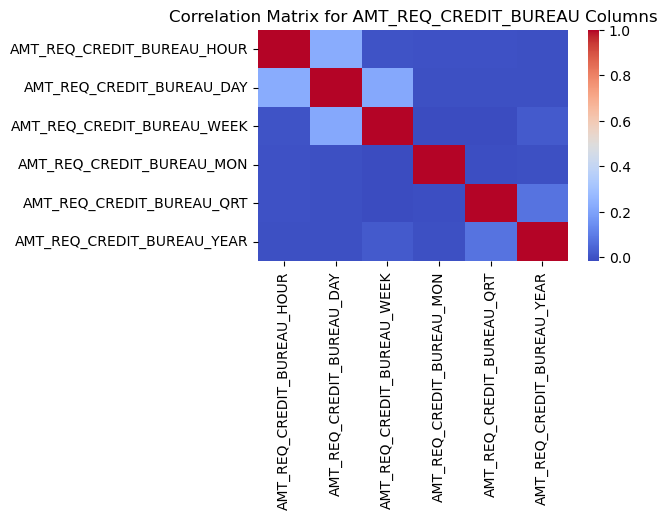

In [22]:
# correlation matrix for column names starting with 'AMT_REQ_CREDIT_BUREAU'
amt_req_cols = [col for col in new_data_v2.columns if col.startswith('AMT_REQ_CREDIT_BUREAU')]
corr_amt_req = new_data_v2[amt_req_cols].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_amt_req, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for AMT_REQ_CREDIT_BUREAU Columns')
plt.show()

From the heatmap, we can observe that the following have some correlation:
- AMT_REQ_CREDIT_BUREAU_HOUR - DAY
- AMT_REQ_CREDIT_BUREAU_DAY - WEEK
- AMT_REQ_CREDIT_BUREAU_QRT - YEAR

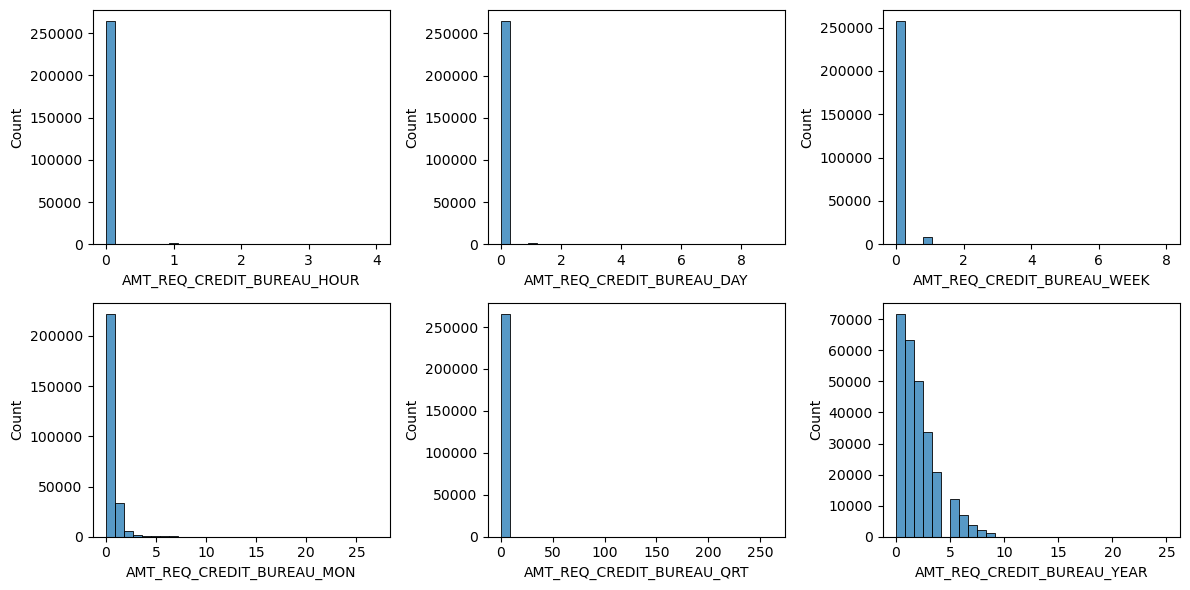

In [23]:
# distributions of values in all columns starting with "AMT_REQ_CREDIT_BUREAU" as subplots
amt_req_cols = [col for col in new_data_v2.columns if col.startswith('AMT_REQ_CREDIT_BUREAU')]
num_cols = len(amt_req_cols)    
num_rows = (num_cols + 2) // 3  # 3 columns per row
plt.figure(figsize=(12, num_rows * 3))
for i, col in enumerate(amt_req_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(new_data_v2[col].dropna(), kde=False, bins=30)
#    plt.title(col)
plt.tight_layout()
plt.show()

This figure shows that `AMT_REQ_CREDIT_BUREAU_YEAR` contains the most non-zero values followed by `AMT_REQ_CREDIT_BUREAU_MON`. Therefore, these two might contribute to the model more than the others. Moreover, `AMT_REQ_CREDIT_BUREAU_MON` was least correlated with others in the correlation heatmap and therefore unique.

In [24]:
# dropping specified columns from new_data_v2
cols_to_drop = [
    'SK_ID_CURR',
    'CODE_GENDER',
    'NAME_TYPE_SUITE',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_QRT',]

new_data_v3 = new_data_v2.drop(columns=cols_to_drop)

In [25]:
# combining multiple 'FLAG_DOCUMENT_X' columns into one column by adding them
# FLAG_DOCUMENT_X columns denote whether a document 'X' was provided (1) or not (0)
# so summing them gives the total number of documents provided

flag_cols = [col for col in new_data_v2.columns if 'FLAG_DOCUMENT' in col]
new_data_v3['FLAG_DOCS_SUM'] = new_data_v2[flag_cols].sum(axis=1)
new_data_v4 = new_data_v3.drop(columns=flag_cols)
print("Shape of new_data_v4 i.e. after dropping cols based on logic:\n", new_data_v4.shape)
print("Shape of new_data_v2 i.e. after eliminating cols with >0.95 correlation:\n", new_data_v2.shape)
print("Shape of new_data_v1 i.e. after dropping cols with >52% missing values:\n", new_data.shape)
print("Shape of original data:\n", data.shape)


Shape of new_data_v4 i.e. after dropping cols based on logic:
 (307511, 41)
Shape of new_data_v2 i.e. after eliminating cols with >0.95 correlation:
 (307511, 79)
Shape of new_data_v1 i.e. after dropping cols with >52% missing values:
 (307511, 92)
Shape of original data:
 (307511, 122)


CHECKING MISSING VALUE STATS OF UPDATED DATA

In [26]:
new_data_v4.isnull().sum()[new_data_v4.isnull().sum() > 0]
missing_val_cols_v4 = new_data_v4.isnull().sum()[new_data_v4.isnull().sum() > 0]    
missing_df_v4 = missing_val_cols_v4.to_frame(name='num_missing_val')
# Add percent missing
missing_df_v4['percent_missing_val'] = round((missing_df_v4['num_missing_val'] / new_data_v4.shape[0]) * 100, 3)
# Add data types
missing_df_v4['dtype'] = data[missing_df_v4.index].dtypes.values
missing_df_v4

,num_missing_val,percent_missing_val,dtype
AMT_ANNUITY,12,0.004,float64
OCCUPATION_TYPE,96391,31.346,object
CNT_FAM_MEMBERS,2,0.001,float64
EXT_SOURCE_2,660,0.215,float64
EXT_SOURCE_3,60965,19.825,float64
APARTMENTS_AVG,156061,50.750,float64
YEARS_BEGINEXPLUATATION_AVG,150007,48.781,float64
LIVINGAREA_AVG,154350,50.193,float64
HOUSETYPE_MODE,154297,50.176,object
TOTALAREA_MODE,148431,48.269,float64


### 2.4 Eliminating columns with <1% correlation with `TARGET`

In [27]:
# calculating correlation between each feature with dtype 'int' or 'float' and the target variable 'TARGET'
num_cols = new_data_v4.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols.remove('TARGET')  # remove target column from the list
correlations = new_data_v4[num_cols + ['TARGET']].corr()['TARGET'].drop('TARGET')
correlations = correlations.abs().sort_values(ascending=False)
print("Correlation of numerical features with TARGET:\n", correlations)


Correlation of numerical features with TARGET:
 EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
DAYS_REGISTRATION              0.041975
REGION_POPULATION_RELATIVE     0.037227
LIVINGAREA_AVG                 0.032997
TOTALAREA_MODE                 0.032596
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
AMT_CREDIT                     0.030369
APARTMENTS_AVG                 0.029498
FLAG_WORK_PHONE                0.028524
FLAG_PHONE                     0.023806
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
FLAG_DOCS_SUM                  0.017193
AMT_ANNUITY                    0.012817
AMT_REQ_CREDIT_BUREAU_MON      0.012462
YEARS_BEGINEXPLUATATION_AVG    0

In [28]:
# dropping columns with correlation < 0.01 with target variable 'TARGET' except AMT_INCOME_TOTAL
cols_to_drop = correlations[correlations < 0.01].index.tolist()
cols_to_drop.remove('AMT_INCOME_TOTAL')
new_data_v5 = new_data_v4.drop(columns=cols_to_drop)
print("Shape of new_data_v5 i.e. after dropping cols with <0.01 correlation with target:\n", new_data_v5.shape)
print("Shape of new_data_v4 i.e. after dropping cols based on logic:\n", new_data_v4.shape)
print("Shape of new_data_v2 i.e. after eliminating cols with >0.95 correlation:\n", new_data_v2.shape)
print("Shape of new_data_v1 i.e. after dropping cols with >52% missing values:\n", new_data.shape)
print("Shape of original data:\n", data.shape)

Shape of new_data_v5 i.e. after dropping cols with <0.01 correlation with target:
 (307511, 35)
Shape of new_data_v4 i.e. after dropping cols based on logic:
 (307511, 41)
Shape of new_data_v2 i.e. after eliminating cols with >0.95 correlation:
 (307511, 79)
Shape of new_data_v1 i.e. after dropping cols with >52% missing values:
 (307511, 92)
Shape of original data:
 (307511, 122)


In [29]:
new_data_v5.isnull().sum()[new_data_v5.isnull().sum() > 0]
missing_val_cols_v5 = new_data_v5.isnull().sum()[new_data_v5.isnull().sum() > 0]    
missing_df_v5 = missing_val_cols_v5.to_frame(name='num_missing_val')
# Add percent missing
missing_df_v5['percent_missing_val'] = round((missing_df_v5['num_missing_val'] / new_data_v5.shape[0]) * 100, 3)
# Add data types
missing_df_v5['dtype'] = data[missing_df_v5.index].dtypes.values
missing_df_v5

,num_missing_val,percent_missing_val,dtype
AMT_ANNUITY,12,0.004,float64
OCCUPATION_TYPE,96391,31.346,object
EXT_SOURCE_2,660,0.215,float64
EXT_SOURCE_3,60965,19.825,float64
APARTMENTS_AVG,156061,50.750,float64
LIVINGAREA_AVG,154350,50.193,float64
HOUSETYPE_MODE,154297,50.176,object
TOTALAREA_MODE,148431,48.269,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332,float64
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332,float64


### 2.5 Imputing numerical cols

In [30]:
# print list of float columns in new_data_v5 with missing values
float_cols_with_missing = new_data_v5.select_dtypes(include='float').columns[new_data_v5.select_dtypes(include='float').isnull().any()].tolist()
float_cols_with_missing

['AMT_ANNUITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'TOTALAREA_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [31]:
# impute the column_names in float_cols_with_missing with median values
# save the result in new_data_v6
new_data_v6 = new_data_v5.copy()
for col in float_cols_with_missing:
    median_value = new_data_v6[col].median()
    new_data_v6[col].fillna(median_value, inplace=True)

C:\Users\dheej\AppData\Local\Temp\ipykernel_11228\2553375955.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data_v6[col].fillna(median_value, inplace=True)
C:\Users\dheej\AppData\Local\Temp\ipykernel_11228\2553375955.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

### 2.6 Imputing categorical cols

In [32]:
new_data_v6.isnull().sum()[new_data_v6.isnull().sum() > 0]
missing_val_cols_v6 = new_data_v6.isnull().sum()[new_data_v6.isnull().sum() > 0]
missing_df_v6 = missing_val_cols_v6.to_frame(name='num_missing_val')
# Add percent missing
missing_df_v6['percent_missing_val'] = round((missing_df_v6['num_missing_val'] / new_data_v6.shape[0]) * 100, 3)
# Add data types
missing_df_v6['dtype'] = data[missing_df_v6.index].dtypes.values
missing_df_v6


,num_missing_val,percent_missing_val,dtype
OCCUPATION_TYPE,96391,31.346,object
HOUSETYPE_MODE,154297,50.176,object


In [33]:
# imputing missing values in OCCUPATION_TYPE with mode
new_data_v7 = new_data_v6.copy()
mode_value = new_data_v7['OCCUPATION_TYPE'].mode()[0]
new_data_v7['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

# imputing missing values in HOUSETYPE_MODE with mode
mode_value = new_data_v7['HOUSETYPE_MODE'].mode()[0]
new_data_v7['HOUSETYPE_MODE'].fillna(mode_value, inplace=True)

C:\Users\dheej\AppData\Local\Temp\ipykernel_11228\4181271242.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data_v7['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)
C:\Users\dheej\AppData\Local\Temp\ipykernel_11228\4181271242.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

`ORGANIZATION_TYPE` has too many unique values

In [34]:
new_data_v6['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [35]:
# ORGANIZATION_TYPE has too many unique values
# Renaming the following values:

# 'Business Entity Type 1', 'Business Entity Type 2',... to 'Business'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Business Entity Type 1': 'Business',
    'Business Entity Type 2': 'Business',
    'Business Entity Type 3': 'Business',
    'Business Entity Type 4': 'Business'
})

# 'Transport: type 1', 'Transport: type 2',... to 'Transport'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport'
})

# 'Industry: type 1', 'Industry: type 2',... to 'Industry'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Industry: type 1': 'Industry',
    'Industry: type 2': 'Industry',
    'Industry: type 3': 'Industry',
    'Industry: type 4': 'Industry',
    'Industry: type 5': 'Industry',
    'Industry: type 6': 'Industry'
})

# 'Trade: type 1', 'Trade: type 2',... to 'Trade'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Trade: type 1': 'Trade',
    'Trade: type 2': 'Trade',
    'Trade: type 3': 'Trade',
    'Trade: type 4': 'Trade'
})

# --------------------------------------------------
# Combining the following values:
# combining SCHOOL and KINDERGARTEN to 'School and Kindergarten'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'School': 'School and Kindergarten',
    'Kindergarten': 'School and Kindergarten'
})

# combining POLICE, SECURITY, SECURITY MINISTRIES, MILITARY to 'Police-Security-Military'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Police': 'Police-Security-Military',
    'Security': 'Police-Security-Military',
    'Security Ministries': 'Police-Security-Military',
    'Military': 'Police-Security-Military'
})

# combining HOTEL and RESTAURANT to 'Hotel and Restaurant'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Hotel': 'Hotel and Restaurant',
    'Restaurant': 'Hotel and Restaurant'
})  

# combining Mobile and Telecom to 'Mobile and Telecom'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Mobile': 'Mobile and Telecom',
    'Telecom': 'Mobile and Telecom'
})

# combining Religion and Culture to 'Religion and Culture'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Religion': 'Religion and Culture',
    'Culture': 'Religion and Culture'
})  

# combining Realtor, Housing, Construction to 'Realtor-Housing-Construction'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Realtor': 'Realtor-Housing-Construction',
    'Housing': 'Realtor-Housing-Construction',
    'Construction': 'Realtor-Housing-Construction'
})

# combining XNA and Other to 'XNA and Other'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'XNA': 'XNA and Other',
    'Other': 'XNA and Other'
})

# combining Bank and Insurance to 'Bank and Insurance'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Bank': 'Bank and Insurance',
    'Insurance': 'Bank and Insurance'
})

# combining Medicine and University to 'Medicine and University'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Medicine': 'Medicine and University',
    'University': 'Medicine and University'
})

# combining Services and Legal Services to 'Services and Legal Services'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Services': 'Services and Legal Services',
    'Legal Services': 'Services and Legal Services'
})

# combining Postal and Government to 'Postal and Government'
new_data_v7['ORGANIZATION_TYPE'] = new_data_v7['ORGANIZATION_TYPE'].replace({
    'Postal': 'Postal and Government',
    'Government': 'Postal and Government'
})



In [36]:
new_data_v7['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business                        84529
XNA and Other                   72057
Self-employed                   38412
School and Kindergarten         15773
Postal and Government           12561
Medicine and University         12520
Police-Security-Military        10196
Realtor-Housing-Construction    10075
Trade: type 7                    7831
Industry                         6363
Trade                            5804
Transport: type 4                5398
Transport                        3592
Industry: type 9                 3368
Bank and Insurance               3104
Hotel and Restaurant             2777
Industry: type 11                2704
Agriculture                      2454
Services and Legal Services      1880
Industry: type 7                 1307
Electricity                       950
Mobile and Telecom                894
Trade: type 6                     631
Emergency                         560
Religion and Culture              464
Advertising                     

In [37]:
# missing values in new_data_v7
len(new_data_v7.isnull().sum()[new_data_v7.isnull().sum() > 0])

0

In [38]:
new_data_v7.shape

(307511, 35)

In [39]:
# save new_data_v7 to a csv file
new_data_v7.to_csv('DL_day08_project_homeloan_data_imputed.csv', index=False)

### 2.7 One-Hot Encoding

In [40]:
# Applying one-hot encoding (0 and 1) to categorical columns in new_data_v7
categorical_cols = new_data_v7.select_dtypes(include=['object']).columns.tolist()
new_data_v8 = pd.get_dummies(new_data_v7, columns=categorical_cols, drop_first=True)
print("Shape of preprocessed data (one-hot encoded), new_data_v8:\n", new_data_v8.shape,'\n')

print("Shape of new_data_v5 i.e. after dropping cols with <0.01 correlation with target:\n", new_data_v5.shape)
print("Shape of new_data_v4 i.e. after dropping cols based on logic:\n", new_data_v4.shape)
print("Shape of new_data_v2 i.e. after eliminating cols with >0.95 correlation:\n", new_data_v2.shape)
print("Shape of new_data_v1 i.e. after dropping cols with >52% missing values:\n", new_data.shape)
print("Shape of original data:\n", data.shape)


Shape of preprocessed data (one-hot encoded), new_data_v8:
 (307511, 99) 

Shape of new_data_v5 i.e. after dropping cols with <0.01 correlation with target:
 (307511, 35)
Shape of new_data_v4 i.e. after dropping cols based on logic:
 (307511, 41)
Shape of new_data_v2 i.e. after eliminating cols with >0.95 correlation:
 (307511, 79)
Shape of new_data_v1 i.e. after dropping cols with >52% missing values:
 (307511, 92)
Shape of original data:
 (307511, 122)


In [41]:
# replace True with 1 and False with 0 in boolean columns
bool_cols = new_data_v8.select_dtypes(include=['bool']).columns.tolist()
new_data_v8[bool_cols] = new_data_v8[bool_cols].astype(int)
new_data_v8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 99 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             307511 non-null  int64  
 1   CNT_CHILDREN                                       307511 non-null  int64  
 2   AMT_INCOME_TOTAL                                   307511 non-null  float64
 3   AMT_CREDIT                                         307511 non-null  float64
 4   AMT_ANNUITY                                        307511 non-null  float64
 5   REGION_POPULATION_RELATIVE                         307511 non-null  float64
 6   DAYS_BIRTH                                         307511 non-null  int64  
 7   DAYS_EMPLOYED                                      307511 non-null  int64  
 8   DAYS_REGISTRATION                                  307511 non-null  float6

In [42]:
# save new_data_v8 to a csv file
new_data_v8.to_csv('DL_day08_project_homeloan_data_OHE.csv', index=False)


## 3. ANN model

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras.callbacks import Callback

In [ ]:
data = pd.read_csv('DL_day08_project_homeloan_data_OHE.csv')

### 3.1 Train_Test_Split

In [4]:
X = data.iloc[:, 1:].values
y = data.iloc[:, [0]].values # needs to be 2D array for keras

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# label normalization
# Data contains 0s and 1s by default, so no need to normalize

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)


Checking if stratify worked correctly in train_test_split

In [45]:
# For y_train
classes, counts = np.unique(y_train, return_counts=True)
print("y_train class counts:")
for cls, count in zip(classes, counts):
    print(f"Class {cls} count: {count}")
    print(f"Class {cls} ratio: {count/len(y_train):.2f}")

# For y_test
classes, counts = np.unique(y_test, return_counts=True)
print("\ny_test class counts:")
for cls, count in zip(classes, counts):
    print(f"Class {cls} count: {count}")
    print(f"Class {cls} ratio: {count/len(y_test):.2f}")

y_train class counts:
Class 0 count: 226148
Class 0 ratio: 0.92
Class 1 count: 19860
Class 1 ratio: 0.08

y_test class counts:
Class 0 count: 56538
Class 0 ratio: 0.92
Class 1 count: 4965
Class 1 ratio: 0.08


### 3.2 ANN Model Building

#### 3.2.1 model_01

- 5 hidden layers 
- Num of units: 98, 49, 25, 12, 6
- 1st layer with 98 units - because 98 features

In [25]:
model = ks.Sequential([
    ks.layers.Dense(98, activation='relu', input_shape=(X_train.shape[1],)),
    ks.layers.Dense(49, activation='relu'),
    ks.layers.Dense(25, activation='relu'),
    ks.layers.Dense(12, activation='relu'),
    ks.layers.Dense(6, activation='relu'),

    ks.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)])

d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
class MyCLRuleMonitor(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyCLRuleMonitor,self).__init__()
    self.cl=cl

  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy', 'val_f1_score']
    trainScore = logs['accuracy', 'f1_score']

    if testScore > trainScore and testScore >= self.cl:
      self.model.stop_training=True

In [48]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    #validation_data=(X_test, y_test), 
                    #callbacks=[MyCLRuleMonitor(0.55)]
                    ) 

Epoch 1/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9149 - f1_score: 0.0082 - loss: 0.2785 - val_accuracy: 0.9198 - val_f1_score: 0.0000e+00 - val_loss: 0.2533
Epoch 2/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9187 - f1_score: 3.4586e-04 - loss: 0.2547 - val_accuracy: 0.9196 - val_f1_score: 0.0050 - val_loss: 0.2528
Epoch 3/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9198 - f1_score: 0.0174 - loss: 0.2519 - val_accuracy: 0.9198 - val_f1_score: 0.0115 - val_loss: 0.2522
Epoch 4/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9200 - f1_score: 0.0197 - loss: 0.2492 - val_accuracy: 0.9196 - val_f1_score: 0.0095 - val_loss: 0.2526
Epoch 5/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9175 - f1_score: 0.0302 - loss: 0.2543 - val_accuracy: 0.9196 - val_f1_score: 0.0242 - val_loss: 0.2530
Epoch 6/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9197 - f1_score: 0.0368 - loss: 0.2495 - val_accuracy: 0.

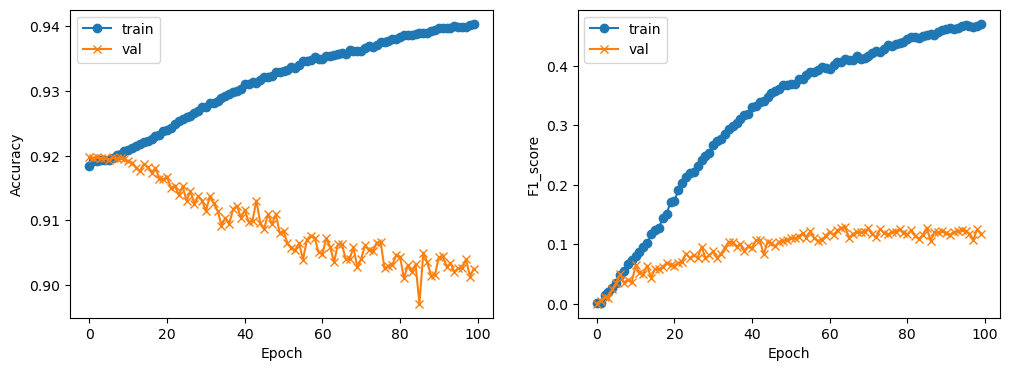

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56538
           1       0.23      0.08      0.12      4965

    accuracy                           0.90     61503
   macro avg       0.58      0.53      0.54     61503
weighted avg       0.87      0.90      0.88     61503


confusion_matrix:
 [[55141  1397]
 [ 4543   422]]


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history.history['accuracy'], marker='o', label='train')
ax[0].plot(history.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['f1_score'], marker='o', label='train')
ax[1].plot(history.history['val_f1_score'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()


y_prob = (model.predict(X_test))
y_pred = (y_prob > 0.5).astype(int)
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))


In [50]:
model.save('DL_day08_project_homeloan_model_v1.keras')

#### 3.2.2 model_03
- added `class_weights` to increase weights on minority class

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)

model3 = ks.Sequential([
    ks.layers.Dense(98, activation='relu', input_shape=(X_train.shape[1],)),
    ks.layers.Dense(49, activation='relu'),
    ks.layers.Dense(25, activation='relu'),
    ks.layers.Dense(12, activation='relu'),
    ks.layers.Dense(6, activation='relu'),

    ks.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)])

d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train.ravel())  # or y_train.flatten() converts 2D array to 1D

class_weight_dict = dict(zip(np.unique(y_train), class_weights))


history3 = model3.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    )

Epoch 1/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6530 - f1_score: 0.2251 - loss: 0.6315 - val_accuracy: 0.6480 - val_f1_score: 0.2395 - val_loss: 0.6466
Epoch 2/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6639 - f1_score: 0.2474 - loss: 0.6057 - val_accuracy: 0.7035 - val_f1_score: 0.2531 - val_loss: 0.5464
Epoch 3/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6721 - f1_score: 0.2525 - loss: 0.6038 - val_accuracy: 0.6600 - val_f1_score: 0.2428 - val_loss: 0.6381
Epoch 4/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6745 - f1_score: 0.2593 - loss: 0.5979 - val_accuracy: 0.6801 - val_f1_score: 0.2463 - val_loss: 0.5915
Epoch 5/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6773 - f1_score: 0.2605 - loss: 0.5948 - val_accuracy: 0.6556 - val_f1_score: 0.2406 - val_loss: 0.6251
Epoch 6/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6678 - f1_score: 0.2556 - loss: 0.5929 - val_accuracy: 0.6324 - va

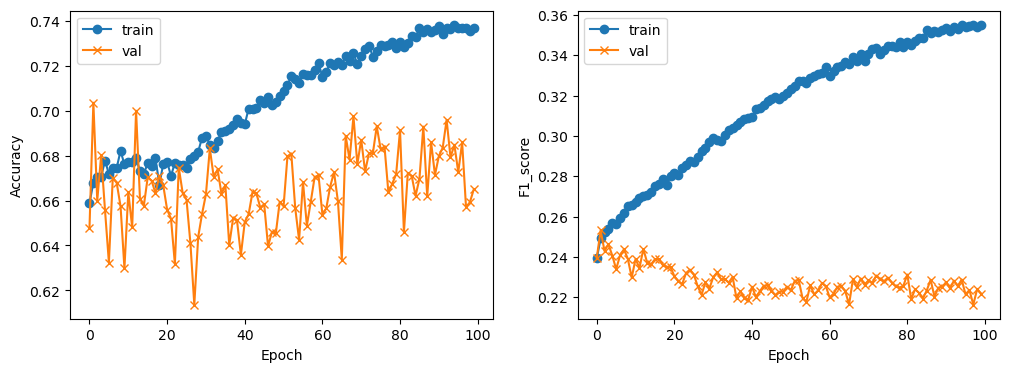

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.67      0.79     56538
           1       0.13      0.58      0.22      4965

    accuracy                           0.66     61503
   macro avg       0.54      0.62      0.50     61503
weighted avg       0.88      0.66      0.74     61503


confusion_matrix:
 [[37965 18573]
 [ 2108  2857]]


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history3.history['accuracy'], marker='o', label='train')
ax[0].plot(history3.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history3.history['f1_score'], marker='o', label='train')
ax[1].plot(history3.history['val_f1_score'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
y_probs = (model3.predict(X_test))
y_pred = (y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))

In [55]:
model3.save('DL_day08_project_homeloan_model_v3.keras')

#### 3.2.3 model_04

- using class_weights as done in previous model
- including 98 hidden layers with 33 neurons each - more complex ANN, following the rule of:
    - num of hidden layers = num of features, and
    - num of units per layer = 1/3rd of num of features


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)

model4 = ks.Sequential(
    # input layer
    [ks.layers.Dense(33, activation='relu', input_shape=(X_train.shape[1],))] +
    
    # adding 97 hidden layers with 33 neurons each
    [ks.layers.Dense(33, activation='relu') for _ in range(97)] +
    
    # output layer
    [ks.layers.Dense(1, activation='sigmoid')]
    )

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)]
              )


d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
class_weights4 = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train.ravel())  # or y_train.flatten() converts 2D array to 1D

class_weight_dict4 = dict(zip(np.unique(y_train), class_weights4))

history4 = model4.fit(X_train, y_train,
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    class_weight=class_weight_dict4,
                    #callbacks=[MyCLRuleMonitor(0.55)]
                    )

Epoch 1/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.4043 - f1_score: 0.1422 - loss: 0.6951 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.6894
Epoch 2/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3245 - f1_score: 0.1404 - loss: 0.6983 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.6815
Epoch 3/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7253 - f1_score: 0.1021 - loss: 0.6938 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.6925
Epoch 4/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.3838 - f1_score: 0.1414 - loss: 0.6963 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.6926
Epoch 5/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.4399 - f1_score: 0.1406 - loss: 0.6935 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.6917
Epoch 6/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5842 - f1_score: 0.1111 - loss: 0.6911 -

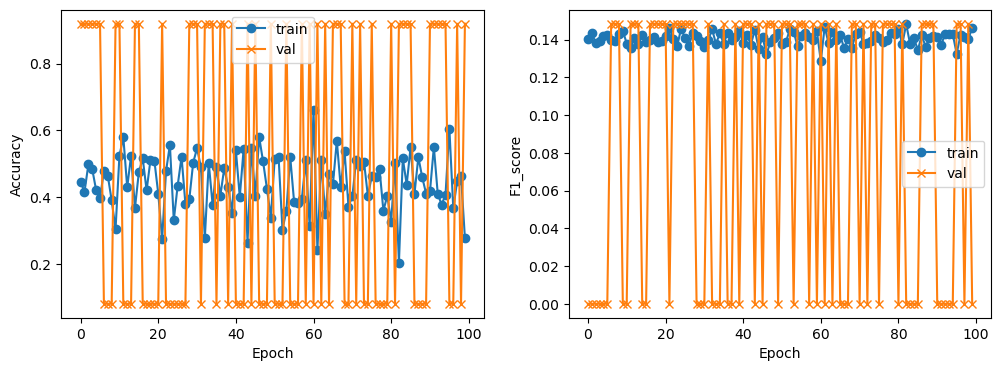

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503


confusion_matrix:
 [[56538     0]
 [ 4965     0]]


d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history4.history['accuracy'], marker='o', label='train')
ax[0].plot(history4.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history4.history['f1_score'], marker='o', label='train')
ax[1].plot(history4.history['val_f1_score'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()

y_probs = (model4.predict(X_test))
y_pred = (y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))

#### 3.2.4 model_05

- Reducing the num of hidden layers from 5 to 3 - just this made no difference compared to 5 h_layer model
- Therefore, reduced 5 hidden layers to 3 and then added dropout to all 3 hidden layers

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)

model5 = ks.Sequential([
    ks.layers.Dense(98, activation='relu', input_shape=(X_train.shape[1],)),
    # Adding dropout layer to reduce overfitting
    ks.layers.Dropout(0.6),  
    #ks.layers.Dense(49, activation='relu'),
    ks.layers.Dense(25, activation='relu'),
    ks.layers.Dropout(0.6), 
    #ks.layers.Dense(12, activation='relu'),
    ks.layers.Dense(25, activation='relu'), # changed n_units from 6 to 25
    ks.layers.Dropout(0.6),

    ks.layers.Dense(1, activation='sigmoid')
])

model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)])

d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train.ravel())  # or y_train.flatten() converts 2D array to 1D

class_weight_dict = dict(zip(np.unique(y_train), class_weights))


history5 = model5.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    )

Epoch 1/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4821 - f1_score: 0.1540 - loss: 0.7494 - val_accuracy: 0.6895 - val_f1_score: 0.2434 - val_loss: 0.6602
Epoch 2/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6615 - f1_score: 0.2158 - loss: 0.6557 - val_accuracy: 0.6846 - val_f1_score: 0.2485 - val_loss: 0.5873
Epoch 3/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6607 - f1_score: 0.2371 - loss: 0.6412 - val_accuracy: 0.6733 - val_f1_score: 0.2467 - val_loss: 0.5954
Epoch 4/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6760 - f1_score: 0.2427 - loss: 0.6339 - val_accuracy: 0.6603 - val_f1_score: 0.2417 - val_loss: 0.5788
Epoch 5/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6702 - f1_score: 0.2438 - loss: 0.6301 - val_accuracy: 0.6814 - val_f1_score: 0.2465 - val_loss: 0.5747
Epoch 6/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6699 - f1_score: 0.2420 - loss: 0.6317 - val_accuracy: 0.6583 - va

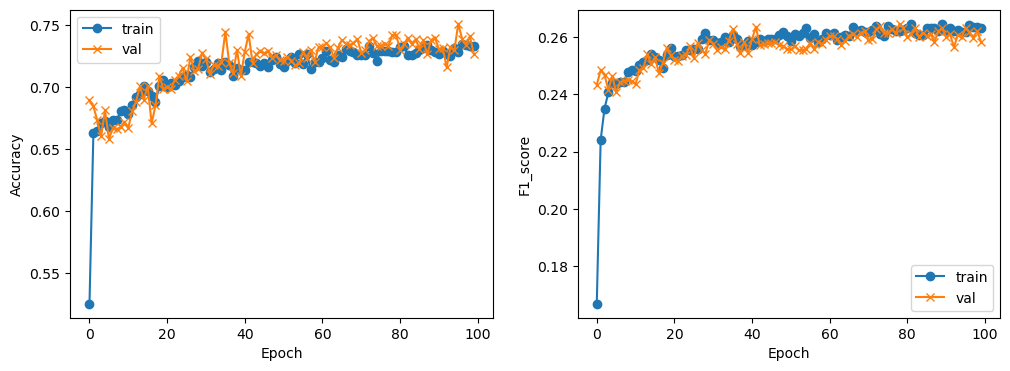

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83     56538
           1       0.16      0.58      0.25      4965

    accuracy                           0.72     61503
   macro avg       0.56      0.66      0.54     61503
weighted avg       0.89      0.72      0.78     61503


confusion_matrix:
 [[41675 14863]
 [ 2089  2876]]


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history5.history['accuracy'], marker='o', label='train')
ax[0].plot(history5.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history5.history['f1_score'], marker='o', label='train')
ax[1].plot(history5.history['val_f1_score'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
y_probs = (model5.predict(X_test))
y_pred = (y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))

In [32]:
model.save('DL_day08_project_homeloan_model_v5.keras')

#### 3.2.5 model_06

- 98 hidden layers with 33 neurons each 
- Regularized with dropout + L1 for each hidden layer

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)

model6 = ks.Sequential(
    # input layer
    [ks.layers.Dense(33, activation='relu', kernel_regularizer='l1',input_shape=(X_train.shape[1],))] +
    [ks.layers.Dropout(0.6)] +
    
    # adding 97 hidden layers with 33 neurons each
    [ks.layers.Dense(33, activation='relu', kernel_regularizer='l1') for _ in range(97)] +
    [ks.layers.Dropout(0.6)] +
    
    # output layer
    [ks.layers.Dense(1, activation='sigmoid')]
    )

model6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)]
              )

d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train.ravel())  # or y_train.flatten() converts 2D array to 1D

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

history6 = model6.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    )

Epoch 1/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.4931 - f1_score: 0.1396 - loss: 22.9500 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.8320
Epoch 2/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.3705 - f1_score: 0.1439 - loss: 0.8343 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.8269
Epoch 3/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.3814 - f1_score: 0.1359 - loss: 0.8366 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.8281
Epoch 4/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.4439 - f1_score: 0.1375 - loss: 0.8348 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.8286
Epoch 5/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.5491 - f1_score: 0.1315 - loss: 0.8342 - val_accuracy: 0.0801 - val_f1_score: 0.1484 - val_loss: 0.8384
Epoch 6/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.3875 - f1_score: 0.1432 - loss: 0.8339 - 

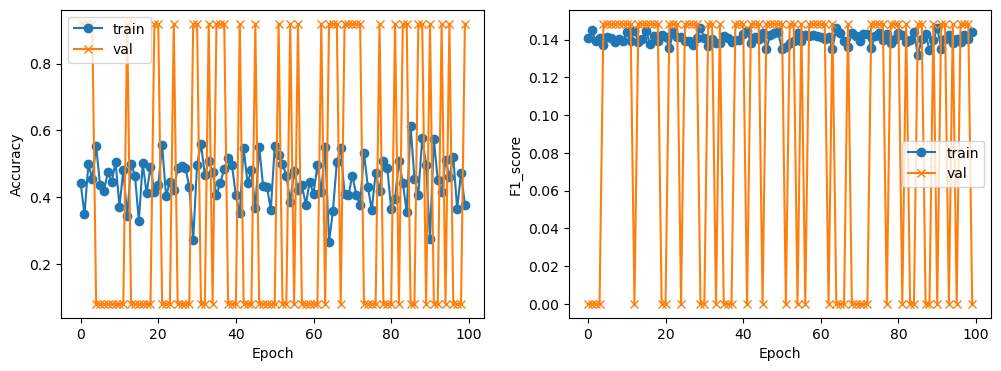

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503


confusion_matrix:
 [[56538     0]
 [ 4965     0]]


d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history6.history['accuracy'], marker='o', label='train')
ax[0].plot(history6.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history6.history['f1_score'], marker='o', label='train')
ax[1].plot(history6.history['val_f1_score'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
y_probs = (model6.predict(X_test))
y_pred = (y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))

#### 3.2.6 model_07

- 3 hidden layers + class weights + dropout + L1 regularizer

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)

model7 = ks.Sequential([
    ks.layers.Dense(98, activation='relu', kernel_regularizer='l1', input_shape=(X_train.shape[1],)),
    # Adding dropout layer to reduce overfitting
    ks.layers.Dropout(0.6),  
    
    ks.layers.Dense(25, activation='relu', kernel_regularizer='l1'),
    ks.layers.Dropout(0.6), 
    
    ks.layers.Dense(25, activation='relu', kernel_regularizer='l1'), 
    ks.layers.Dropout(0.6),

    ks.layers.Dense(1, activation='sigmoid')
])

model7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)])

d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train.ravel())  # or y_train.flatten() converts 2D array to 1D

class_weight_dict = dict(zip(np.unique(y_train), class_weights))


history7 = model7.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    )

Epoch 1/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3566 - f1_score: 0.1435 - loss: 2.9358 - val_accuracy: 0.0801 - val_f1_score: 0.1484 - val_loss: 0.7077
Epoch 2/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3241 - f1_score: 0.1433 - loss: 0.7072 - val_accuracy: 0.0801 - val_f1_score: 0.1484 - val_loss: 0.7112
Epoch 3/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4118 - f1_score: 0.1411 - loss: 0.7065 - val_accuracy: 0.0801 - val_f1_score: 0.1484 - val_loss: 0.7088
Epoch 4/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4636 - f1_score: 0.1363 - loss: 0.7067 - val_accuracy: 0.9199 - val_f1_score: 0.0000e+00 - val_loss: 0.7060
Epoch 5/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6764 - f1_score: 0.0973 - loss: 0.7046 - val_accuracy: 0.0801 - val_f1_score: 0.1484 - val_loss: 0.7070
Epoch 6/100
3076/3076 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3574 - f1_score: 0.1431 - loss: 0.7085 - val_accuracy: 0.0801

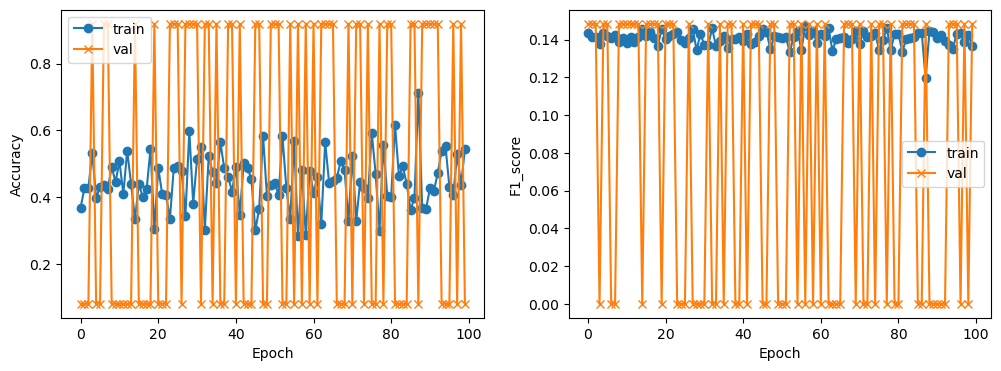

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step
classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     56538
           1       0.08      1.00      0.15      4965

    accuracy                           0.08     61503
   macro avg       0.04      0.50      0.07     61503
weighted avg       0.01      0.08      0.01     61503


confusion_matrix:
 [[    0 56538]
 [    0  4965]]


d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history7.history['accuracy'], marker='o', label='train')
ax[0].plot(history7.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history7.history['f1_score'], marker='o', label='train')
ax[1].plot(history7.history['val_f1_score'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
y_probs = (model7.predict(X_test))
y_pred = (y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))

#### 3.2.7 model_08

- repeating model_05 but replacing relu activation fn with leaky_relu

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=4)


In [35]:
# Flatten labels to 1D
y_train = np.array(y_train).reshape(-1).astype(int)
y_test = np.array(y_test).reshape(-1).astype(int)

# Ensure labels are flattened to shape (N,) and are int
#y_train = np.array(y_train).reshape(-1).astype(int)
#y_test = np.array(y_test).reshape(-1).astype(int)

# Create tf.data.Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

# Define the custom callback
class MacroF1Callback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        y_true = []
        y_pred = []
        for x_batch, y_batch in self.validation_data:
            y_probs = self.model.predict(x_batch, verbose=0)
            y_preds = (y_probs > 0.5).astype(int).flatten()
            y_true.extend(y_batch.numpy().flatten())
            y_pred.extend(y_preds)
        macro_f1 = f1_score(y_true, y_pred, average='macro')
        print(f"\nEpoch {epoch+1} — val_macro_f1: {macro_f1:.4f}")
        if logs is not None:
            logs['val_macro_f1'] = macro_f1

In [36]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)  # or y_train.flatten() converts 2D array to 1D

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# model building
model8 = ks.Sequential([
    ks.layers.Dense(98, activation='leaky_relu', input_shape=(X_train.shape[1],)),
    # Adding dropout layer to reduce overfitting
    ks.layers.Dropout(0.6),  
    
    ks.layers.Dense(25, activation='leaky_relu'),
    ks.layers.Dropout(0.6), 
    
    ks.layers.Dense(25, activation='leaky_relu'), 
    ks.layers.Dropout(0.6),

    ks.layers.Dense(1, activation='sigmoid')
])

model8.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', ] # tf.keras.metrics.F1Score(name='f1_score', threshold=0.5)])
              )

d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
X_test.shape, y_test.shape

((61503, 98), (61503,))

In [38]:
# model fit
history8 = model8.fit(
                    #X_train, y_train, 
                    train_dataset,
                    validation_data=val_dataset,
                    epochs=10, 
                    #batch_size=64, 
                    #class_weight=class_weight_dict,
                    callbacks=[MacroF1Callback(validation_data=val_dataset)],
                    )

Epoch 1/10
3842/3844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.4119
Epoch 1 — val_macro_f1: 0.4792
3844/3844 ━━━━━━━━━━━━━━━━━━━━ 70s 18ms/step - accuracy: 0.8650 - loss: 0.4118 - val_accuracy: 0.9193 - val_loss: 0.2567 - val_macro_f1: 0.4792
Epoch 2/10
3827/3844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9190 - loss: 0.2648
Epoch 2 — val_macro_f1: 0.4792
3844/3844 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.9190 - loss: 0.2648 - val_accuracy: 0.9193 - val_loss: 0.2558 - val_macro_f1: 0.4792
Epoch 3/10
3843/3844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9190 - loss: 0.2603
Epoch 3 — val_macro_f1: 0.4796
3844/3844 ━━━━━━━━━━━━━━━━━━━━ 67s 17ms/step - accuracy: 0.9190 - loss: 0.2603 - val_accuracy: 0.9193 - val_loss: 0.2548 - val_macro_f1: 0.4796
Epoch 4/10
3844/3844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9190 - loss: 0.2577
Epoch 4 — val_macro_f1: 0.4792
3844/3844 ━━━━━━━━━━━━━━━━━━━━ 65s 17ms/step - accuracy: 0.9190 - loss: 0.2577 - val_accurac

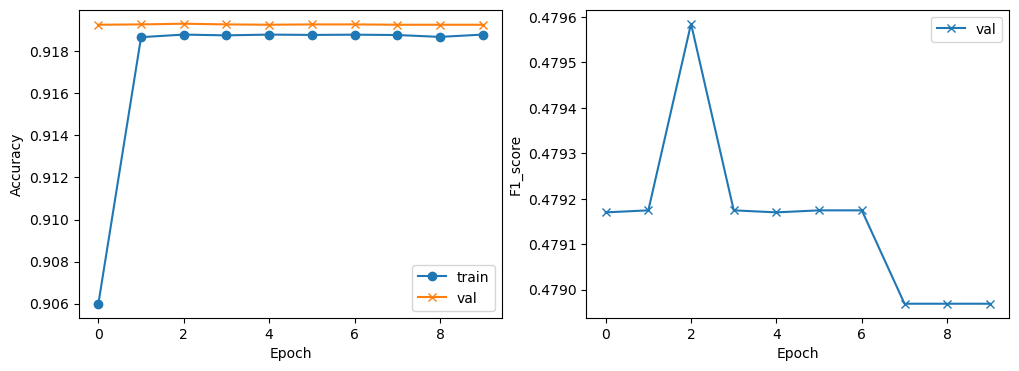

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step
classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503


confusion_matrix:
 [[56538     0]
 [ 4965     0]]


d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history8.history['accuracy'], marker='o', label='train')
ax[0].plot(history8.history['val_accuracy'], marker='x', label='val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

#ax[1].plot(history8.history['f1_score'], marker='o', label='train')
ax[1].plot(history8.history['val_macro_f1'], marker='x', label='val')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('F1_score')
ax[1].legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
y_probs = (model8.predict(X_test))
y_pred = (y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, y_pred))

### 3.3 Comparing F1 score - best ANN model vs Random Forest Classifier

- If RF Classifier performs better than my ANN, then there's something wrong with my ANN architecture
- If RF Classifier does not perform better, then the ANN model quality is being affected my the dataset quality.


In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)


d:\Anaconda3_24.10\envs\tfenv\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_y_probs = rf.predict(X_test)
rf_y_pred = (rf_y_probs > 0.5).astype("int32")
print("classification_report:\n", classification_report(y_test, rf_y_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test, rf_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.47      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503


confusion_matrix:
 [[56529     9]
 [ 4957     8]]


- Initially, my ANN model generally struggled to predict true positives (1s).
- Turns out that the RF Classifier is also struggling to predict true positives (1s). This means that the ANN architecture can only be optimized to a certain extent, and it is the high class imbalance in the dataset that reduces the model f1_score.
- The classification report of my best ANN: model_05 shows a better F1_score (shown below) than the RF (shown above):
    - classification report of ANN model_05
    ```
    - class 0 f1_score = 0.83
    - class 1 f1_score = 0.25
    - macro_avg        = 0.54
    - weighted_avg     = 0.78
    ```
    - classification report of RF Classifier
    ```
    - class 0 f1_score = 0.96
    - class 1 f1_score = 0    - unable to identify class 1; not good
    - macro_avg        = 0.48
    - weighted_avg     = 0.88
    ```

- Confusion matrix of ANN model_05 (below) looks better than that of RF (above):

    - confusion_matrix of ANN model_05:
    ```
    [[41675 14863]
    [ 2089  2876]] - much better
    ```
    - confusion_matrix of RF Classifer:
    ```
    [[56529     9]
    [ 4957     8]]
    ```


### 3.4 Comparing PR curve - ANNs vs Random Forest

In [ ]:
# PR curve for RF model 
rf_y_probs = rf.predict_proba(X_test)[:, 1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_probs)

# PR curve for model1
model_y_probs = model.predict(X_test)
model_precision, model_recall, _ = precision_recall_curve(y_test, model_y_probs)

# PR curve for model3
model3_y_probs = model3.predict(X_test)
model3_precision, model3_recall, _ = precision_recall_curve(y_test, model3_y_probs)

# PR curve for model4 
model4_y_probs = model4.predict(X_test)
model4_precision, model4_recall, _ = precision_recall_curve(y_test, model4_y_probs)

# PR curve for model5 
model5_y_probs = model5.predict(X_test)
model5_precision, model5_recall, _ = precision_recall_curve(y_test, model5_y_probs)

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step


In [40]:
# PR curve for model6
model6_y_probs = model6.predict(X_test)
model6_precision, model6_recall, _ = precision_recall_curve(y_test, model6_y_probs)

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [49]:
# PR curve for model7
model7_y_probs = model7.predict(X_test)
model7_precision, model7_recall, _ = precision_recall_curve(y_test, model7_y_probs)

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step


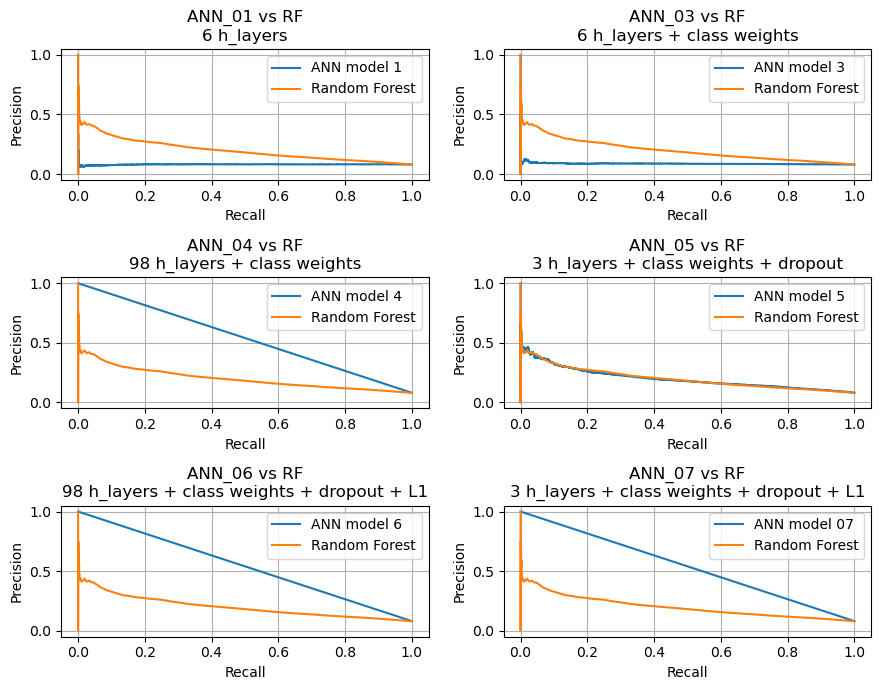

In [ ]:
# PR curves of all models each compared with Random Forest
fig, ax = plt.subplots(3, 2, figsize=(9, 7))

# PR curve for model_01 vs RF
ax[0, 0].plot(model_recall, model_precision, label='ANN model 1')
ax[0, 0].plot(rf_recall, rf_precision, label='Random Forest')
ax[0, 0].set_xlabel('Recall')
ax[0, 0].set_ylabel('Precision')
ax[0, 0].set_title('ANN_01 vs RF\n6 h_layers')

# PR curve for model_03 vs RF
ax[0, 1].plot(model3_recall, model3_precision, label='ANN model 3')
ax[0, 1].plot(rf_recall, rf_precision, label='Random Forest')
ax[0, 1].set_xlabel('Recall')
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_title('ANN_03 vs RF\n6 h_layers + class weights')

# PR curve for model_04 vs RF
ax[1, 0].plot(model4_recall, model4_precision, label='ANN model 4')
ax[1, 0].plot(rf_recall, rf_precision, label='Random Forest')
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_ylabel('Precision')
ax[1, 0].set_title('ANN_04 vs RF\n98 h_layers + class weights')

# PR curve for model_05 vs RF
ax[1, 1].plot(model5_recall, model5_precision, label='ANN model 5')
ax[1, 1].plot(rf_recall, rf_precision, label='Random Forest')
ax[1, 1].set_xlabel('Recall')
ax[1, 1].set_ylabel('Precision')
ax[1, 1].set_title('ANN_05 vs RF\n3 h_layers + class weights + dropout')

# PR curve for model_06 vs RF
ax[2, 0].plot(model6_recall, model6_precision, label='ANN model 6')
ax[2, 0].plot(rf_recall, rf_precision, label='Random Forest')
ax[2, 0].set_xlabel('Recall')
ax[2, 0].set_ylabel('Precision')
ax[2, 0].set_title('ANN_06 vs RF\n98 h_layers + class weights + dropout + L1')

# PR curve for model_07 vs RF
ax[2, 1].plot(model7_recall, model7_precision, label='ANN model 7')
ax[2, 1].plot(rf_recall, rf_precision, label='Random Forest')
ax[2, 1].set_xlabel('Recall')
ax[2, 1].set_ylabel('Precision')
ax[2, 1].set_title('ANN_07 vs RF\n3 h_layers + class weights + dropout + L1')

for a in ax.flat:
    a.legend()
    a.grid()
plt.tight_layout()
plt.show()

## Conclusion

>The home loan dataset seems to be a classic example of a high class imbalanced dataset.

> Artificially re-sampling with SMOTE was an option, but generating synthetic data to achieve higher scores was avoided.

From the figure showing the PR curves, we can see that ANN models 4, 6, 7 display the most area under the curve. However,..:
- model 4 predicts only class label 0
- model 6 predicts only class label 0 again
- model 7 predicts only class label 1

On the other hand, the following models predict both class labels:
- model 1 , but the PR curve is flat and AUC is less
- model 3 , but the PR curve is flat and AUC is less
- model 5 
    - PR curve is not flat
    - PR curve matches Random Forest PR curve
    - Area under PR curve is more than models 1 and 3 
    - Distribution of true positive and true negative predictions is better

Considering the 2 metrics i.e.:
- F1 scores of individual class labels
- PR curves of ANN models compared with Random Forest

.. `ANN model_05` seems to be the best model so far in predicting whether a home-loan applicant will be able to repay the loan based on collected historical data, but can be potentially fine-tuned further.

```
ANN model_05 classification_report:
               precision    recall  f1-score   support
           0       0.95      0.74      0.83     56538
           1       0.16      0.58      0.25      4965
    accuracy                           0.72     61503
   macro avg       0.56      0.66      0.54     61503
weighted avg       0.89      0.72      0.78     61503

ANN model_05 confusion_matrix:
 [[41675 14863]
 [ 2089  2876]]
```


#### ANN architecture / hyperparam observations:
- L1 regularizer was expected to provide better score by adding penalties. Moreover, the in-built feature elimination-like process where features with zero weights are ignored was assumed to be a potentially good idea for this dataset, but did not work in favour.

- Dropout regularization combined with a simplified ANN (3 hidden layers) worked best. The same set of hyperparameters was tested with a complex ANN (98 hidden layers) but failed to predict both class labels.

- In addition, Dropout + L1 regularization was not a good combination (regardless of depth of ANN) since it failed to predict both class labels.